# Problem 2.2 (a)

(Potato in space) What is the equilibrium shape of a $0.0042\,\mathrm{\mu m}^3$ volume of $\mathrm{Al_2SiO_5}$ in free space (stress-free boundaries)? Take the surface energy, $\gamma$, to be equal to $200\,\mathrm{mJ/m^2}$. The crystalline axes a, b, and c are aligned with the x, y, and z-axes of a Cartesian lab coordinate system.

Iterative FFT stress calculation method of

> A PHASE-FIELD MODEL FOR EVOLVING MICROSTRUCTURES WITH STRONG ELASTIC INHOMOGENEITY  
> S. Y. HU and L. Q. CHEN  
> _Acta mater._ **49** (2001) 1879–1890

In [1]:
%matplotlib inline

EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMetrics
EndFontMet

In [2]:
import fipy as fp

In [6]:
from fipy import numerix as nmx

The interface width W between approximately $\varphi = 0.1$ and $\varphi = 0.9$ in this model is given by $W = 2\sqrt{2\kappa/h_0}$, while $\gamma = \sqrt{\kappa h_0/18}$, $\kappa = 1.5\gamma W$, and $h_0 = 12\gamma/W$ (ignoring modification of the phase field order parameter $\varphi$ by the elastic interactions through the interface). Use $\kappa = 3\times 10^{-9}\,\mathrm{J/m}$, and $h_0 = 2.4\times 10^{8}\,\mathrm{J/m^3}$.

In [4]:
kappa = fp.Variable("3e-9 J/m")

In [5]:
h0 = fp.Variable("2.4e8 J/m**3")

In [7]:
W = 2*nmx.sqrt(2*kappa/h0)

In [8]:
print W

1e-08 m


In [9]:
dx = 1e-8 / 5

In [23]:
Lx = 0.4e-6

In [22]:
print (4./3)*nmx.pi*fp.Variable("0.155 mum")*fp.Variable("0.042 mum")*fp.Variable("0.155 mum")

0.00422669875614 mum**3


In [24]:
mesh = fp.Grid2D(dx=dx, Lx=Lx, dy=dx, Ly=Lx) + [[-Lx/2.], [-Lx/2.]]

In [42]:
phase = fp.CellVariable(mesh=mesh, name=r"$\varphi$", value=0., hasOld=True)

In [43]:
phase.setValue(1., where=(mesh.x / 0.155e-6)**2 + (mesh.y / 0.042e-6)**2 <= 1.)

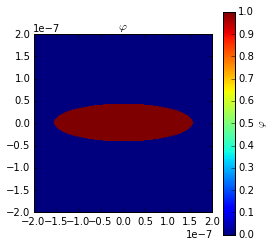

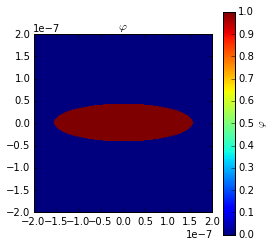

In [44]:
fp.Viewer(vars=phase)

> The total free energy can be written
$$\mathcal{F} = \int \left[f_\mathrm{elastic} + \frac{\kappa}{2}|\nabla \varphi|^2 + h_0 f(\varphi)\right] dV$$
We use a simple interpolation fo the elastic constants
$$C_{ijkl} = h(\varphi) C_{ijkl}^\mathrm{potato}$$
where $h(\varphi)$ is a smooth interpolation function,
$$h(\varphi) = \varphi^3\left[6\varphi^2 - 15\varphi + 10\right]$$
that interpolates between $h(\varphi=0) = 0$ and $h(\varphi=1) = 1$.

> Hint: Find time-evolution equations for $\varphi$ that monotonically drive the total energy to a minimum while preserving the volume. One way to to this is to set up a Cahn-Hilliard equation for $\varphi$.

Our Cahn-Hilliard evolution equation is given by
$$\frac{\partial \varphi}{\partial t} = -M_\varphi \frac{\delta \mathcal{F}}{\delta \varphi}$$
where
$$\begin{align*}
\frac{\delta \mathcal{F}}{\delta \varphi} 
&= \frac{\partial f_\mathrm{elastic}}{\partial\varphi} - \kappa \nabla^2 \varphi + h_0 \frac{\partial f(\varphi)}{\partial\varphi} \\
&= \frac{\partial f_\mathrm{elastic}}{\partial\varphi} - \kappa \nabla^2 \varphi + h_0 \frac{\partial}{\partial\varphi}\left[\varphi^2\left(\varphi - 1\right)^2\right] \\
&= \frac{\partial f_\mathrm{elastic}}{\partial\varphi} - \kappa \nabla^2 \varphi + 2 h_0 \varphi\left(\varphi - 1\right)\left(2\varphi - 1\right)
\end{align*}$$

Let $M_\mathrm{\varphi} = 1$

In [45]:
Mphase = 1.

We linearize the source as per usual
$$\begin{align*}
\frac{\partial S}{\partial \varphi} &= \frac{\partial}{\partial \varphi}\left[2 h_0 \varphi\left(\varphi - 1\right)\left(2\varphi - 1\right)\right] \\
&= \frac{\partial}{\partial \varphi}\left[2 h_0 \varphi\left(\varphi - 1\right)\left(2\varphi - 1\right)\right] \\
&= 2 h_0 \left[2\varphi\left(\varphi - 1\right) + 1\right]
\end{align*}$$

In [46]:
dSdphase = 2 * h0 * (2 * phase * (phase - 1) + 1)

So, 
$$\begin{align*}
S_0 &= \left(S - \frac{\partial S}{\partial\varphi}\varphi\right)_\mathrm{old} \\
&= \left[2 h_0 \varphi\left(\varphi - 1\right)\left(2\varphi - 1\right) - \frac{\partial S}{\partial\varphi}\varphi\right]_\mathrm{old} \\
\end{align*}$$

In [47]:
S0 = 2 * h0 * phase * (phase - 1) * (2 * phase - 1) - dSdphase * phase

and
$S_1 = \left.\frac{\partial S}{\partial \varphi}\right\rvert_\mathrm{old}$

Let's ignore the elastic energy for now

In [48]:
phaseEq = fp.TransientTerm(coeff=1./Mphase) == fp.DiffusionTerm(coeff=kappa) - S0 - fp.ImplicitSourceTerm(coeff=dSdphase)

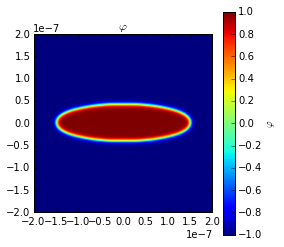

In [52]:
viewer = fp.Viewer(vars=phase, datamin=0., datamax=1.)

In [57]:
phase.value = 0.
phase.setValue(1., where=(mesh.x / 0.155e-6)**2 + (mesh.y / 0.042e-6)**2 <= 1.)

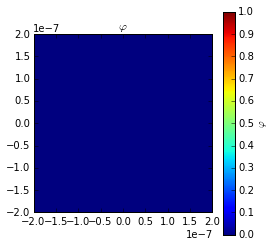

8.68359287993e-07


KeyboardInterrupt: 

In [58]:
for step in xrange(1000000):
    print phase.cellVolumeAverage
    
    phase.updateOld()
    for sweep in range(10):
        res = phaseEq.sweep(var=phase, dt=1.)
    viewer.plot()